210000
{'url': 'http://m4.biz.itc.cn/pic/new/n/71/65/Img8296571_n.jpg', 'image_id': '8f00f3d0f1008e085ab660e70dffced16a8259f6.jpg', 'caption': ['两个衣着休闲的人在平整的道路上交谈', '一个穿着红色上衣的男人和一个穿着灰色裤子的男人站在室外的道路上交谈', '室外的公园里有两个穿着长裤的男人在交流', '街道上有一个穿着深色外套的男人和一个穿着红色外套的男人在交谈', '道路上有一个身穿红色上衣的男人在和一个抬着左手的人讲话']}


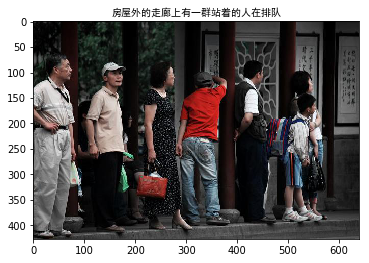

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片
import json

import os
import pandas as pd

img_path = r"F:\data\ai_challenger_caption_train_20170902\caption_train_images_20170902"
img_name = r'fffd34d6f8f1e8741d65bb75d735f76757287f8f.jpg'

label_path = r"F:\data\ai_challenger_caption_train_20170902\caption_train_annotations_20170902.json"


def loadLabel(label_path):
    f = open(label_path, encoding='utf-8') #设置以utf-8解码模式读取文件，encoding参数必须设置，否则默认以gbk模式读取文件，当文件中包含中文时，会报错
    labels = json.load(f)
    return labels


img = mpimg.imread(img_path+'\\'+img_name)


labels = loadLabel(label_path)
print(len(labels))
print(labels[0])

for i in labels:
    if i['image_id']==img_name:
        label = i['caption'][0]

plt.subplot(1, 1, 1)
title = label
plt.title(title, fontproperties='SimHei')
plt.imshow(img, cmap='gray')
plt.show()

In [55]:
#### 读取所有图片名称存为csv ####

rootdir = r'F:\data\ai_challenger_caption_train_20170902\caption_train_images_20170902'
img_list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
print(len(img_list))
print(img_list[:3])
# for i in range(0,len(list)):
#     path = os.path.join(rootdir,list[i])
#     if os.path.isfile(path):
#         print(path) 

result = pd.DataFrame(img_list)
print(result.head())
result.rename(columns={0: 'img'}, inplace=True) 
print(result.head())
result.to_csv(r"F:\data\ai_challenger_caption_train_20170902\img_name.csv", index=True,header=True)
print('save done!')

210000
['0000252aea98840a550dac9a78c476ecb9f47ffa.jpg', '000041512fa82558167d5cd9b1f7bc1b24e4ceea.jpg', '000078b2a9c37d4004124720cdfa3b1667ca43ff.jpg']
                                              0
0  0000252aea98840a550dac9a78c476ecb9f47ffa.jpg
1  000041512fa82558167d5cd9b1f7bc1b24e4ceea.jpg
2  000078b2a9c37d4004124720cdfa3b1667ca43ff.jpg
3  0000ab10e435518335540b4ec216fa7cc2ee90c7.jpg
4  0000e06c1fc586992dc2445e9e102899ccb5e3fc.jpg
                                            img
0  0000252aea98840a550dac9a78c476ecb9f47ffa.jpg
1  000041512fa82558167d5cd9b1f7bc1b24e4ceea.jpg
2  000078b2a9c37d4004124720cdfa3b1667ca43ff.jpg
3  0000ab10e435518335540b4ec216fa7cc2ee90c7.jpg
4  0000e06c1fc586992dc2445e9e102899ccb5e3fc.jpg
save done!


In [58]:
img_names = pd.read_csv(r"F:\data\ai_challenger_caption_train_20170902\img_name.csv")

def getLabels(img_name):
    global labels
    for i in labels:
        if i['image_id']==img_name:
            label1 = i['caption'][0]
    return label1

print('start apply!')
img_names['label1'] = img_names['img'].apply(getLabels)
print('end apply!')
print(img_names.head())

start apply!
end apply!
   Unnamed: 0                                           img  \
0           0  0000252aea98840a550dac9a78c476ecb9f47ffa.jpg   
1           1  000041512fa82558167d5cd9b1f7bc1b24e4ceea.jpg   
2           2  000078b2a9c37d4004124720cdfa3b1667ca43ff.jpg   
3           3  0000ab10e435518335540b4ec216fa7cc2ee90c7.jpg   
4           4  0000e06c1fc586992dc2445e9e102899ccb5e3fc.jpg   

                         label1  
0  一个穿着黑色裤子的男人搂着一个穿着裙子的女人在冰面上滑冰  
1           两个穿着不同球服的球员头碰头站在球场上  
2      一个拿着花束的女人和一个穿着西服的男人站在舞台上  
3       网吧里的两个人旁边有一个戴着耳机的女人在玩游戏  
4          运动场上有一个右手拿着球拍的女人在打网球  


In [91]:
img_names1 = pd.read_csv(r"F:\data\ai_challenger_caption_train_20170902\img_names.csv",encoding = 'gb18030')
img_names2 = img_names1.loc[:,{'img','label1'}]
#img_names3 = img_names2.T
img_names2.to_csv(r"F:\data\ai_challenger_caption_train_20170902\img_names1.csv", index=True,header=True,columns=['img','label1'])
print('done')

done
